### Import Necessary libraries 

In [7]:
import pandas as pd
import numpy as np 
import scipy.optimize as opt 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import keras

### Import the dataset

In [8]:
data = pd.read_excel('Dataset2Use_Assignment1.xlsx')


## Preview the data

In [9]:
print(data.head())

   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   
1           335.917481    

In [10]:
x= data.iloc[:,:-2]
#print(x.head())
y= data.iloc[:,-2]
#we arent interested in column ετος 

In [11]:
np.unique(y)

array([1, 2], dtype=int64)

#### factorize the y column (from 1,2 -> 0,1)

In [12]:
y, levels = pd.factorize(y,sort=True)
np.unique(y)

array([0, 1], dtype=int64)

#### Percentage of companies went  bankrupt (1) or not (0)  in our data

In [14]:
count = pd.Series(y).value_counts()
print(count)

0    10468
1      248
dtype: int64


# split data to train and test

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,random_state=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)





#### Check if the sets are balanced

In [18]:
#lets see the percentage of bancrupt companies in the train and test set

count_y_train = pd.Series(y_train).value_counts()
print(count_y_train)
count_y_test = pd.Series(y_test).value_counts()
print(count_y_test)

0    7331
1     170
dtype: int64
0    3137
1      78
dtype: int64


we observe that the train set is unbalanced.

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train) #fit the model using the training data
#now check for both train and test data, how well the model learned the patterns
#y_pred_train = logreg.predict(X_train)
y_pred_test= logreg.predict(X_test)
y_pred_train= logreg.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='micro')
pre_test = precision_score(y_test, y_pred_test, average='micro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print('confusion_matrix= ','\n' ,+confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

confusion_matrix=  
 [[3137    0]
 [  77    1]]
TN= 3137
FP= 0
FN= 77
TP= 1
acc_test=  0.976049766718507
acc_train=  0.9773363551526463
rec_test=  0.5064102564102564
rec_train=  0.5
f1_test=  0.5065961903736877
f1_train=  0.4942691477885653
precision_train=  0.9773363551526463
precision_test=  0.976049766718507


# DecisionTreeClassifier

In [34]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= 7) #multiple times with different depths to avoid overfitting or underfitting
clf.fit(X_train, y_train) #fit the model using the training data
#now check for both train and test data, how well the model learned the patterns
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='micro')
pre_test = precision_score(y_test, y_pred_test, average='micro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

[[3118   19]
 [  75    3]]
TN= 3118
FP= 19
FN= 75
TP= 3
acc_test=  0.9707620528771385
acc_train=  0.9826689774696707
rec_test=  0.516202398175621
rec_train=  0.6492497612876824
f1_test=  0.5225750394944708
f1_train=  0.715426773749212
precision_train=  0.9826689774696707
precision_test=  0.9707620528771385


### Params and visualization of the Decision tree 

depth:  7
params:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


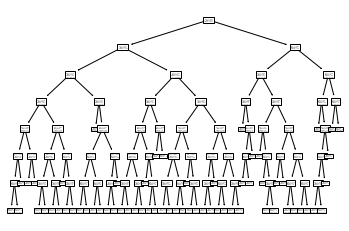

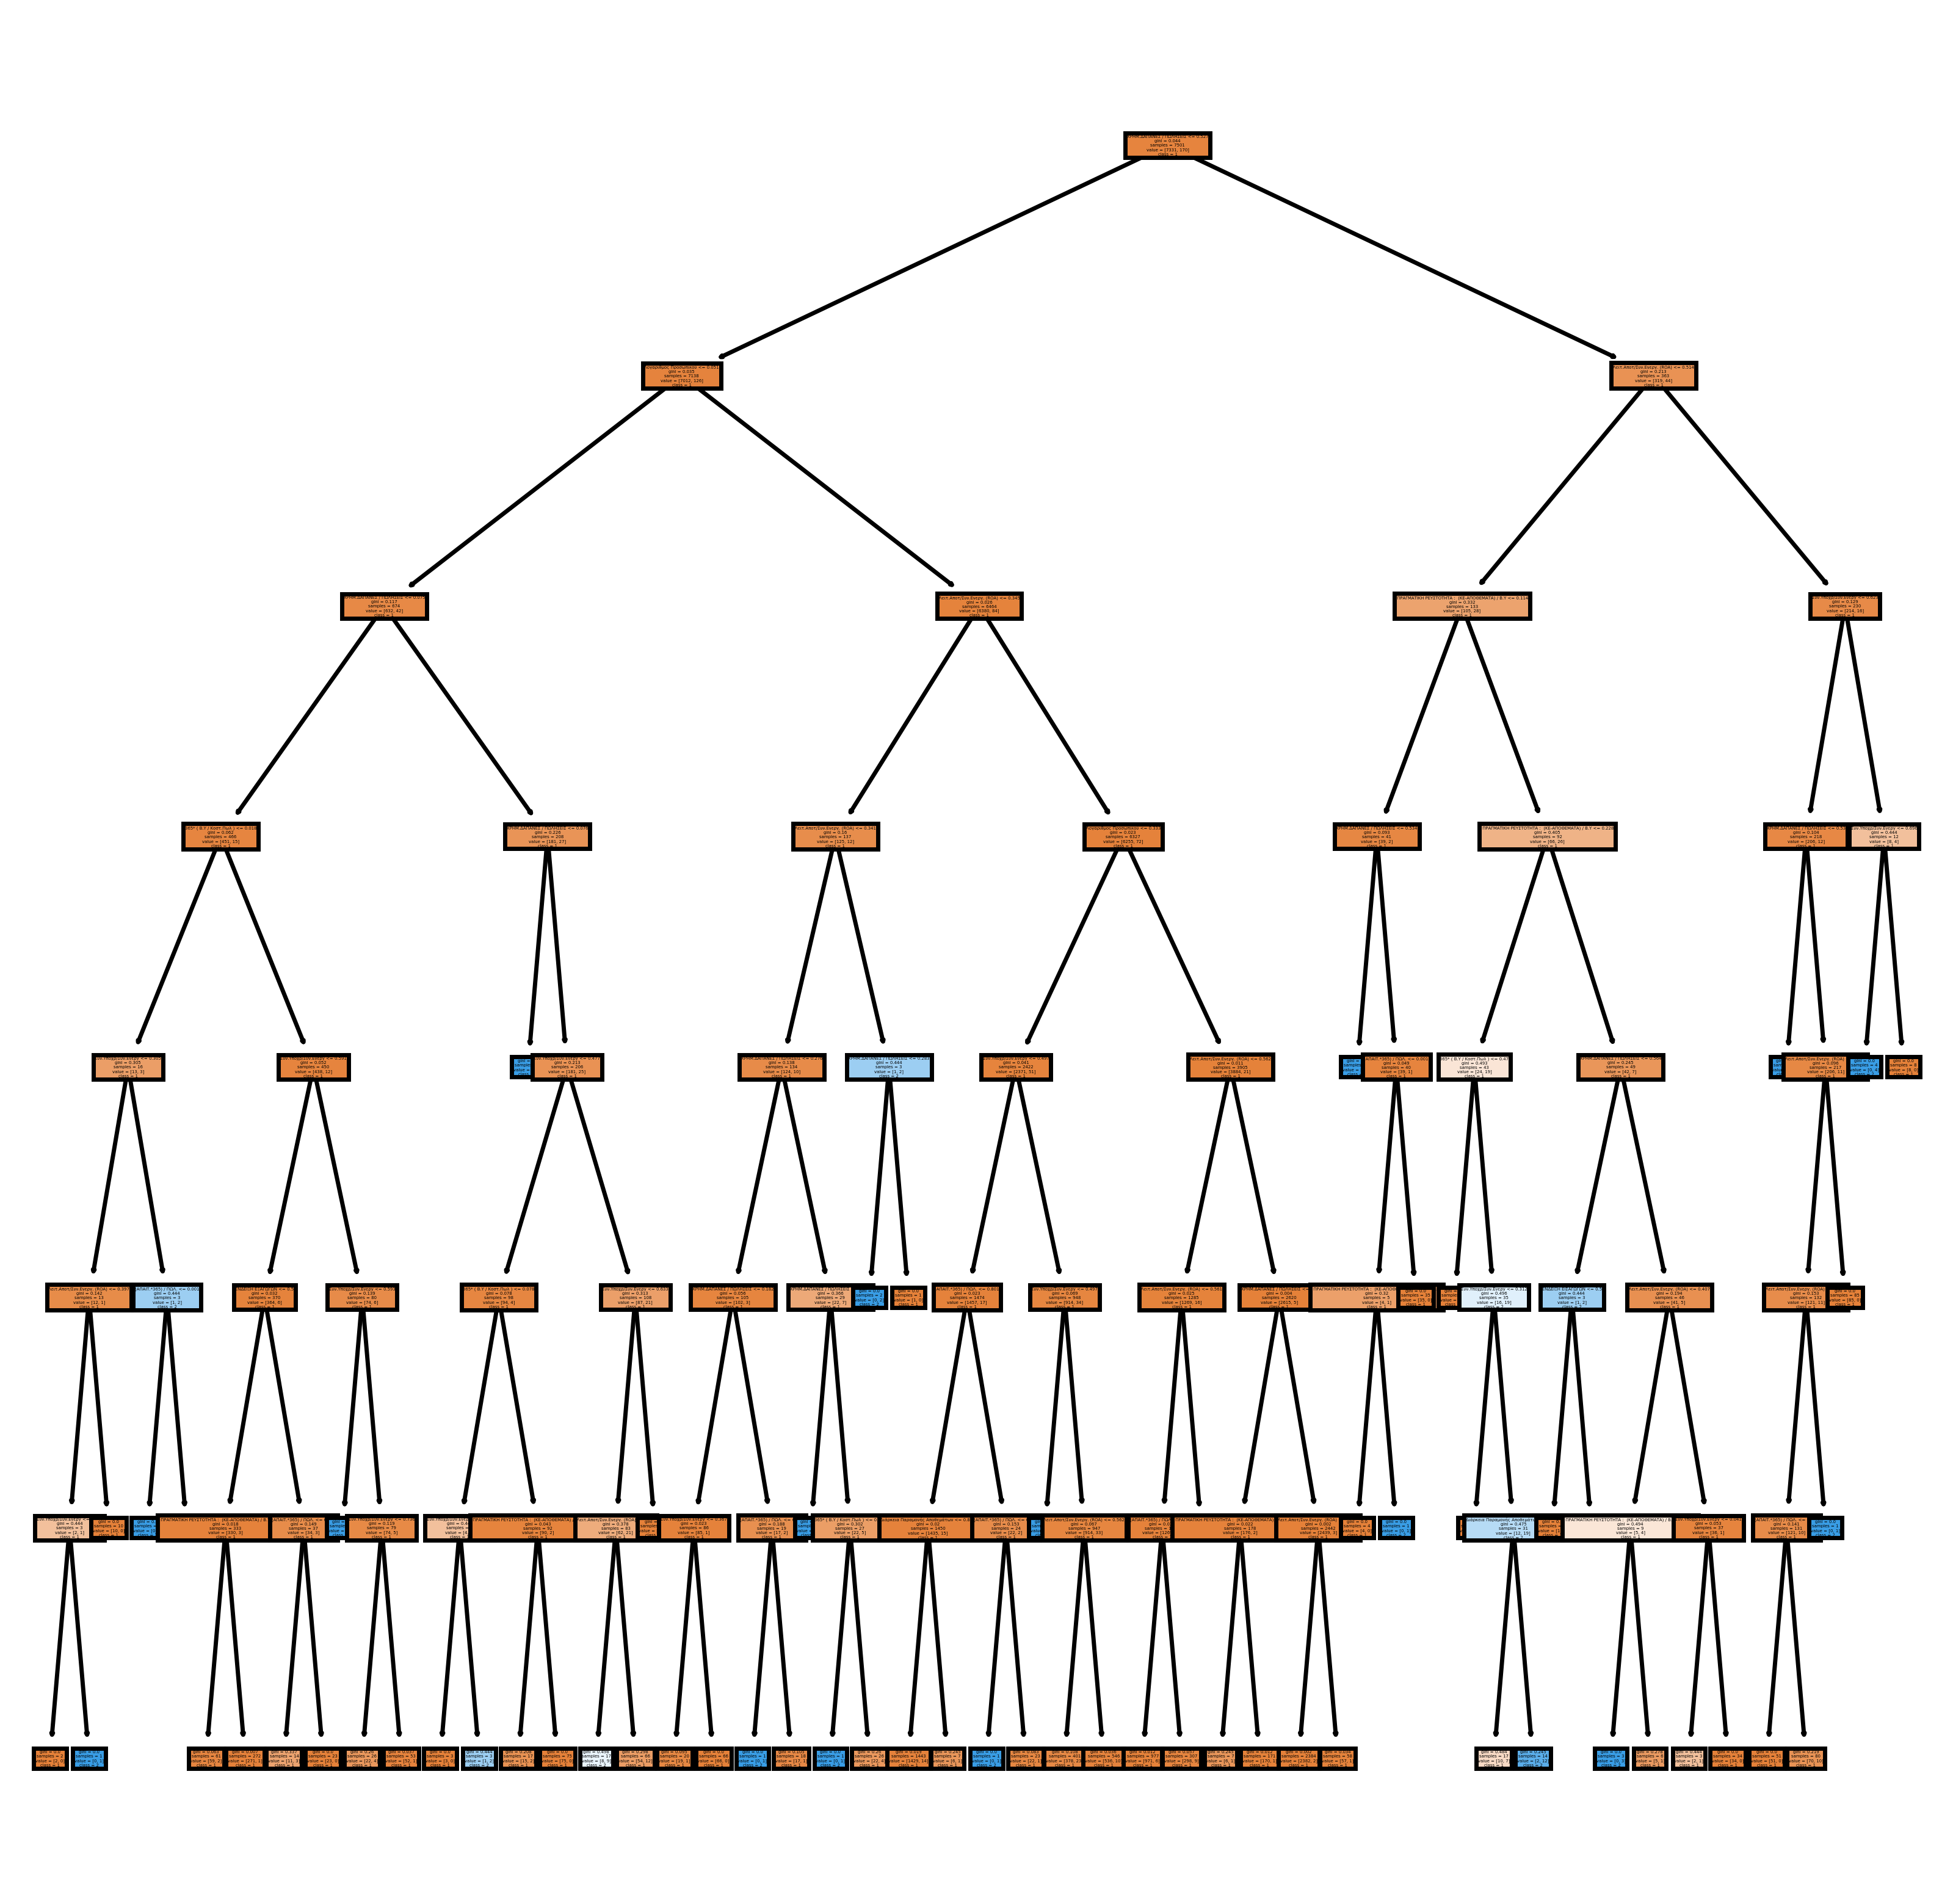

In [35]:
depth= clf.get_depth()
params= clf.get_params()
print('depth: ',depth)
print('params: ',params)
from sklearn import tree
#plt.figure(figsize=(4,4))
#tree.plot_tree(clf,feature_names= x_train.columns, class_names=['1','2'],filled=True)
#plt.tight_layout()
#plt.show()
tree.plot_tree(clf)
fn= x_train.columns
cn=['1','2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=500)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()
fig.savefig('imagename.png')

## KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) #fit the model using the training data
#now check for both train and test data, how well the model learned the patterns
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='macro')
pre_test = precision_score(y_test, y_pred_test, average='macro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

[[3133    4]
 [  73    5]]
TN= 3133
FP= 4
FN= 73
TP= 5
acc_test=  0.976049766718507
acc_train=  0.9780029329422744
rec_test=  0.5314137302501982
rec_train=  0.5233248012068011
f1_test=  0.5514015812525709
f1_train=  0.5386324690104864
precision_train=  0.8528219444107294
precision_test=  0.7663928744714771


## Linear Discriminant Analysis


In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) #fit the model using the training data
#now check for both train and test data, how well the model learned the patterns
y_pred_train = lda.predict(X_train)
y_pred_test = lda.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='macro')
pre_test = precision_score(y_test, y_pred_test, average='macro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

[[3103   34]
 [  74    4]]
TN= 3103
FP= 34
FN= 74
TP= 4
acc_test=  0.9664074650077761
acc_train=  0.9665377949606719
rec_test=  0.520221835331813
rec_train=  0.5318241633032971
f1_test=  0.5259303354341202
f1_train=  0.538408487738503
precision_train=  0.5501309472949777
precision_test=  0.5409853718337392
precision_train=  0.5501309472949777
precision_test=  0.5409853718337392


### NAIVE BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train) #fit the model using the training data
# now check for both train and test data, how well the model learned thepatterns
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
#print('attributes: ', svc.support_vectors_)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='macro')
pre_test = precision_score(y_test, y_pred_test, average='macro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

[[2957  180]
 [  63   15]]
TN= 2957
FP= 180
FN= 63
TP= 15
acc_test=  0.9244167962674961
acc_train=  0.9282762298360219
rec_test=  0.5674640151050735
rec_train=  0.5984389418023381
f1_test=  0.535211418433767
f1_train=  0.5502011174479529
precision_train=  0.5383459015583849
precision_test=  0.5280310748853795


## Support Vector Classifier

In [49]:
#import SVC and create an SVC object
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train) #fit the model using the training data
# now check for both train and test data, how well the model learned the patterns
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
#print('attributes: ', svc.support_vectors_)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='micro')
pre_test = precision_score(y_test, y_pred_test, average='micro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

[[3137    0]
 [  78    0]]
TN= 3137
FP= 0
FN= 78
TP= 0
acc_test=  0.9757387247278383
acc_train=  0.9773363551526463
rec_test=  0.5
rec_train=  0.5
f1_test=  0.493860201511335
f1_train=  0.4942691477885653
precision_train=  0.9773363551526463
precision_test=  0.9757387247278383


## NEURAL NETWORK

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
#finally, build a feed forward neural network using keras
model = Sequential()
model.add(keras.layers.Dense(64, input_dim=X_train.shape[1],
activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
#display the architecture
#model.summary()
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
#train the model
model.fit(X_train, keras.utils.np_utils.to_categorical(y_train),
epochs=100, verbose=True)
y_pred_train = np.argmax(model.predict(X_train),axis=-1)
y_pred_test = np.argmax(model.predict(X_test),axis=-1)
#print('attributes: ', svc.support_vectors_)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
pre_train = precision_score(y_train, y_pred_train, average='micro')
pre_test = precision_score(y_test, y_pred_test, average='micro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print(confusion_matrix(y_test,y_pred_test))
TN=(confusion_matrix(y_test,y_pred_test)[0,0])
print("TN=",TN)
FP= (confusion_matrix(y_test,y_pred_test)[0,1])
print('FP=',FP)
FN= (confusion_matrix(y_test,y_pred_test)[1,0])
print('FN=',FN)
TP= (confusion_matrix(y_test,y_pred_test)[1,1])
print('TP=',TP)
print('acc_test= ',acc_test)
print('acc_train= ',acc_train)
print('rec_test= ',rec_test)
print('rec_train= ',rec_train)
print('f1_test= ',f1_test)
print('f1_train= ',f1_train)
print('precision_train= ',pre_train)
print('precision_test= ',pre_test)

Epoch 1/100
235/235 [==============================] - 1s 1ms/step - loss: 0.1680 - accuracy: 0.9731
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9773
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9773
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9773
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9773
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9773
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9773
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9773
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9773
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0882 - accura